In [1]:
#Total precipitation amount including only precipitation values that are greater than the 99th percentile of precip 
#on wet days (precip > 1mm)

#Open the file with the desired station

#-------------------------------------------------------------
#FINDING THE 99TH PERCENTILE (1961-1990)

#
#Loop through each year:

#    within the year find all of the lines of data that hold precipitation information
#    Variable in question :: PRCP
#    Create a new array filled with the lines of data including PRCP values
#    Loop through each line:

#    If the value is coded as missing (PRCP = 9999) skip this value
#    If the value is < 1mm skip this value
#    If the value is > 1mm add it to the new array called 'total' and move on to the next value

#  Move onto the next year continuously adding to the 'total' array

#  Order the array with all the values > 1mm in order from smallest to largest
#  Multiply the number of values in the array (n) by the percentile desired (.99)
#    New variable for the 99th percentile = RRwn
#  Find the 99th percentile value: total[99n] = 99p

#--------------------------------------------------------------
#Trend of precipitation events above the 99th percentile:
#For any given year find the number of days where the precipitation amount is above the 99th percentile (1961-1990)

#Similar process as above

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import loadtxt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Opening a GHCN-D file and reading variables
#Lincoln Station = USW00014939
#Asheville: USW00003812
# Omaha:'USW00014942'

station = 'USW00023065'     #Goodland
 
filename = '/Users/rphinney/Documents/Hollings/ghcnd_all/'+station+'.dly'
file = open(filename, 'r')

In [4]:
#Using ghcnd-stations.txt get the station information

path = '/Users/rphinney/Documents/Hollings/ghcnd-stations.txt'

station_file = open(path)
ghcnd = []

for x in station_file:
    ghcnd.append(x)
        
for each_line in ghcnd:   
    if each_line[0:11] == station:
        station_name = each_line[40:70]
        station_state = each_line[38:40]
        station_name.strip()
        print(station_name)

 GOODLAND                     


In [5]:
#create an array (mylist) filled with each line of data
#the format type of the array is string so the numbers will need to be converted to integers later on

mylist = []
    
for line in file:
    mylist.append(line)

In [6]:
#define our range of years for normals
begin_year = 1980
end_year = 2010


all_prcp = []
for year in range(begin_year, end_year):
    year_prcp = []
    #all_prcp = []
    for line in mylist:
        if int(line[11:15]) == year:
            if line[17:21] == 'PRCP':
                year_prcp.append(line)
                
    for data in year_prcp:
        char1 = 22
        char2 = 26
        while char1 != 270:
            if data[char1:char2] == '9999':
                char1 = char1 + 8
                char2 = char2 + 8
            elif int(data[char1:char2]) < 1.:
                char1 = char1 + 8
                char2 = char2 + 8
            else:
                prcp = (.003937*int(data[char1:char2]))      #convert to inches
                all_prcp.append(prcp)
                char1 = char1 + 8
                char2 = char2 + 8
all_prcp.extend(all_prcp)            
 
#print(size(all_prcp))
    

In [7]:
# sort the data from smallest value to largest
all_prcp = sorted(all_prcp)

In [8]:
# find the percentile location

n_elements = size(all_prcp)

#Variable can be changed depending on which percentile is being used
percentile = .95

loc = round(percentile*n_elements)
print(loc)

4575


In [9]:
# find the precipitation value at the percentile location

RRwn = (all_prcp[loc])

print(RRwn)

0.999998


In [10]:
#plots the number of days in which the precipitation amount was greater than the 99th percentile for a given year
#plots the annual amount of precipitation when the daily amount is greater than the 99th percentile

days = []
annual = []

#range of years  ***add code to find this automatically
#find the first year

for first in mylist:
    if first[17:21] == "PRCP":
        min_year = int(first[11:15])
        break
        
print(min_year)
max_year = 2017



for year in range(min_year,max_year):
    year_prcp = []
    for line in mylist:
        if int(line[11:15]) == year:
            if line[17:21] == 'PRCP':
                year_prcp.append(line)
     
    new_prcp = []
    for data in year_prcp:
        char1 = 22
        char2 = 26
        while char1 != 270:
            if data[char1:char2] == '9999':
                char1 = char1 + 8
                char2 = char2 + 8
            else:
                prcp = (.003937*int(data[char1:char2])) 
                new_prcp.append(prcp)
                char1 = char1 + 8
                char2 = char2 + 8
                
    #print(new_prcp)
    day_count = 0  
    annprcp = 0
    for one in new_prcp:
        if one > RRwn:
            day_count = 1 + day_count
            annprcp = one + annprcp
    
   
    days.append(day_count)
    annual.append(annprcp)

        
        
            
                

1895


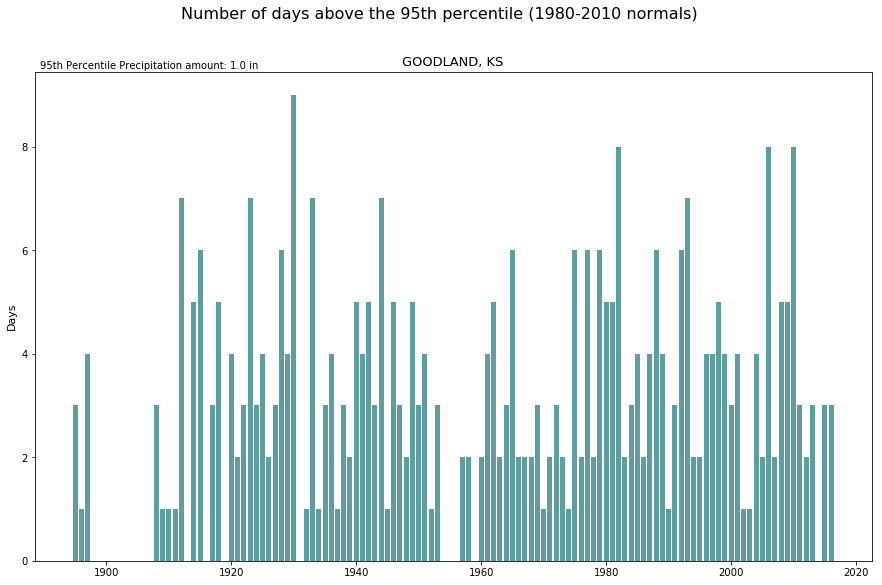

In [11]:
#%matplotlib notebook


xaxis = ['1950', '1960', '1970', '1980', '1990','2000', '2010']
y = [2,12,22,32,42,52,62]
year = np.arange(min_year, 2017)
plt.figure(figsize(15, 9))
plt.bar(year, days, color = 'cadetblue', align = 'center')

plt.suptitle ('Number of days above the ' + str(int(percentile*100))+ 'th percentile (1980-2010 normals)', size = 16)
plt.title(station_name.strip()+ ', '+station_state, size = 13)
plt.ylabel('Days', size = 11)
#plt.xticks(y, xaxis)
plt.figtext(.13, .884, str(int(percentile*100))+'th Percentile Precipitation amount: '+ str(round(RRwn,2)) + ' in')

#savefig('/Users/rphinney/Documents/Hollings/station_data/'+str(int(percentile*100))+'/figures/'+station+'.png')

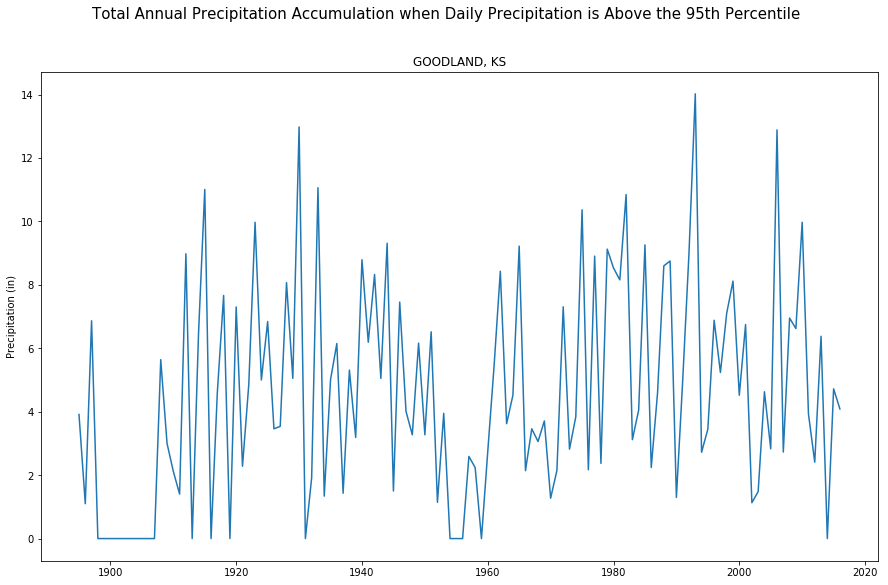

In [12]:
year = np.arange(min_year, max_year)
plt.plot(year, annual)
plt.suptitle('Total Annual Precipitation Accumulation when Daily Precipitation is Above the ' +str(int(percentile*100))+'th Percentile', size = 15)
plt.ylabel('Precipitation (in)')
plt.title(station_name.strip()+', '+station_state, size = 12)


In [24]:
#Get the 95th percentile

# find the percentile location
n_elements = size(all_prcp)

#Variable can be changed depending on which percentile is being used
percentile = .95

loc = round(percentile*n_elements)

RRwn = (all_prcp[loc])


#plots the number of days in which the precipitation amount was greater than the 99th percentile for a given year
#plots the annual amount of precipitation when the daily amount is greater than the 99th percentile

days2 = []
annual2 = []

#range of years  ***add code to find this automatically
#find the first year

for first in mylist:
    if first[17:21] == "PRCP":
        min_year = int(first[11:15])
        break
        
max_year = 2017



for year in range(min_year,max_year):
    year_prcp = []
    for line in mylist:
        if int(line[11:15]) == year:
            if line[17:21] == 'PRCP':
                year_prcp.append(line)
     
    new_prcp = []
    for data in year_prcp:
        char1 = 22
        char2 = 26
        while char1 != 270:
            if data[char1:char2] == '9999':
                char1 = char1 + 8
                char2 = char2 + 8
            else:
                prcp = (.003937*int(data[char1:char2])) 
                new_prcp.append(prcp)
                char1 = char1 + 8
                char2 = char2 + 8
                
    #print(new_prcp)
    day_count = 0  
    annprcp = 0
    for one in new_prcp:
        if one > RRwn:
            day_count = 1 + day_count
            annprcp = one + annprcp
    
   
    days2.append(day_count)
    annual2.append(annprcp)



In [41]:
#Find the 99th percentile

# find the percentile location
n_elements = size(all_prcp)

#Variable can be changed depending on which percentile is being used
percentile = .99

loc = round(percentile*n_elements)

RRwn = (all_prcp[loc])


#plots the number of days in which the precipitation amount was greater than the 99th percentile for a given year
#plots the annual amount of precipitation when the daily amount is greater than the 99th percentile

days3 = []
annual3 = []

#range of years  ***add code to find this automatically
#find the first year

for first in mylist:
    if first[17:21] == "PRCP":
        min_year = int(first[11:15])
        break
        
max_year = 2017



for year in range(min_year,max_year):
    year_prcp = []
    for line in mylist:
        if int(line[11:15]) == year:
            if line[17:21] == 'PRCP':
                year_prcp.append(line)
     
    new_prcp = []
    for data in year_prcp:
        char1 = 22
        char2 = 26
        while char1 != 270:
            if data[char1:char2] == '9999':
                char1 = char1 + 8
                char2 = char2 + 8
            else:
                prcp = (.003937*int(data[char1:char2])) 
                new_prcp.append(prcp)
                char1 = char1 + 8
                char2 = char2 + 8
                
    #print(new_prcp)
    day_count = 0  
    annprcp = 0
    for one in new_prcp:
        if one > RRwn:
            day_count = 1 + day_count
            annprcp = one + annprcp
            #annprcp = round(annprcp,4)
    
   
    days3.append(day_count)
    annual3.append(annprcp)
   

In [42]:
year = np.arange(min_year,max_year)

#export the data from the first graph into a text file

path = '/Users/rphinney/Documents/Hollings/station_data/'

file_id = open(path+station+'.txt', 'wb')

#annual2 = round(annual2,2)

data = np.array([year,days2,annual2,days,annual,days3,annual3])
data = data.T

np.savetxt(file_id, data, fmt = ['%d','%d','%.2f','%d','%.2f','%d','%.2f'])

file_id.close()